In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("dataset/Social_Network_Ads.csv")
data["Gender"].replace({"Male" : 1, "Female" :2},inplace = True)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,2,46,41000,1
396,15706071,1,51,23000,1
397,15654296,2,50,20000,1
398,15755018,1,36,33000,0


In [3]:
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


Text(0.5, 1.0, 'Correlation matrix')

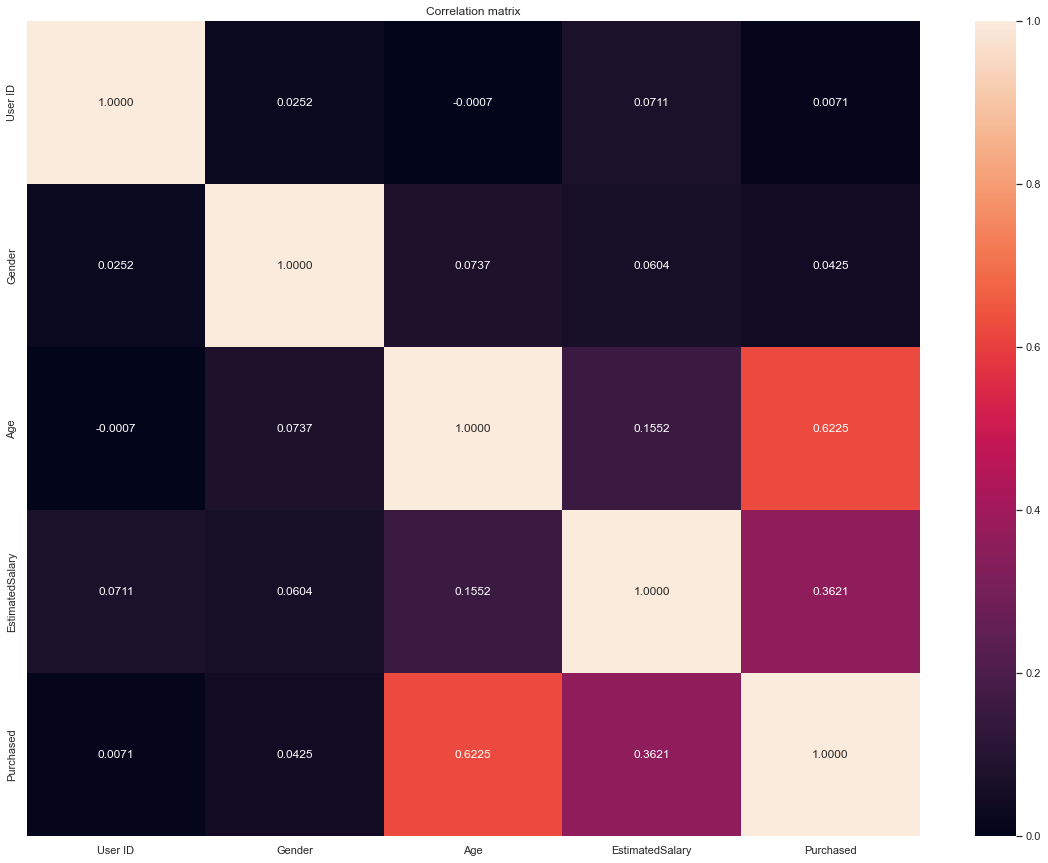

In [4]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr() , annot =True , fmt ="0.4f")
ax.set_title("Correlation matrix")

In [5]:
data.shape

(400, 5)

In [6]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [7]:
from sklearn.model_selection import train_test_split

inp_var = ['User ID','Gender','Age','EstimatedSalary']
target_var = ['Purchased']

#data["sex"] = data["Gender"].astype("int")

X = data[inp_var].values
y = data[target_var].values
test_split_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_split_size, random_state =42)

In [8]:
trainval = (1.0*len(X_train))/(1.0* len(data.index))
testval = (1.0*len(X_test))/(1.0* len(data.index))

print("training_set_value {0:.2f}%".format(trainval*100))
print("testing_set_value {0:.2f}%".format(testval*100))

training_set_value 70.00%
testing_set_value 30.00%


In [9]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression( C= 0.7 , random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_predict = lr_model.predict(X_test)

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,lr_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,lr_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,lr_predict,labels =[1,0]))

Accuracy : 74.17
Confusion Matrix
[[19 28]
 [ 3 70]]
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.40      0.55        47
           0       0.71      0.96      0.82        73

    accuracy                           0.74       120
   macro avg       0.79      0.68      0.68       120
weighted avg       0.77      0.74      0.71       120



In [10]:
#Support Vector Classification

from sklearn.svm import SVC

svm_model = SVC(kernel = "linear" ,C=1, random_state = 1)
svm_model.fit(X_train,y_train.ravel())
svm_predict = svm_model.predict(X_test)
svm_prediction = svm_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,svm_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,svm_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,svm_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,svm_predict,labels =[1,0]))


Accuracy_of_trained_data : 0.76
Accuracy : 71.67
Confusion Matrix
[[16 31]
 [ 3 70]]
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.34      0.48        47
           0       0.69      0.96      0.80        73

    accuracy                           0.72       120
   macro avg       0.77      0.65      0.64       120
weighted avg       0.75      0.72      0.68       120



In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train,y_train.ravel())
dt_model_predict = dt_model.predict(X_test)
training_set_prediction=dt_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,dt_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,dt_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,dt_model_predict,labels =[1,0]))


Accuracy_of_trained_data : 1.00
Accuracy : 88.33
Confusion Matrix
[[39  8]
 [ 6 67]]
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.83      0.85        47
           0       0.89      0.92      0.91        73

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.88       120
weighted avg       0.88      0.88      0.88       120



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10, criterion ="entropy", random_state=1)
rf_model.fit(X_train,y_train.ravel())
rf_model_predict = rf_model.predict(X_test)
training_set_prediction=rf_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,rf_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,rf_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,rf_model_predict,labels =[1,0]))


Accuracy_of_trained_data : 0.99
Accuracy : 89.17
Confusion Matrix
[[39  8]
 [ 5 68]]
Classification Report
              precision    recall  f1-score   support

           1       0.89      0.83      0.86        47
           0       0.89      0.93      0.91        73

    accuracy                           0.89       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' ,p=1)
kn_model.fit(X_train,y_train.ravel())
kn_model_prediction = kn_model.predict(X_test)
training_set_prediction_Accuracy = kn_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction_Accuracy)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,kn_model_prediction)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,kn_model_prediction,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,kn_model_prediction,labels =[1,0]))

Accuracy_of_trained_data : 0.82
Accuracy : 74.17
Confusion Matrix
[[25 22]
 [ 9 64]]
Classification Report
              precision    recall  f1-score   support

           1       0.74      0.53      0.62        47
           0       0.74      0.88      0.81        73

    accuracy                           0.74       120
   macro avg       0.74      0.70      0.71       120
weighted avg       0.74      0.74      0.73       120

